Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Dataset From Local Directory

In [25]:
from google.colab import files
uploaded = files.upload()

Saving Inc_Exp_Data.csv to Inc_Exp_Data (1).csv


Load Dataset

In [26]:
dataset = pd.read_csv('Inc_Exp_Data.csv')

Summarize Dataset

In [27]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(50, 7)
       Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
count        50.000000         50.000000          50.000000        50.000000   
mean      41558.000000      18818.000000           4.060000      3060.000000   
std       26097.908979      12090.216824           1.517382      6241.434948   
min        5000.000000       2000.000000           1.000000         0.000000   
25%       23550.000000      10000.000000           3.000000         0.000000   
50%       35000.000000      15500.000000           4.000000         0.000000   
75%       50375.000000      25000.000000           5.000000      3500.000000   
max      100000.000000      50000.000000           7.000000     35000.000000   

       Annual_HH_Income  No_of_Earning_Members  
count      5.000000e+01              50.000000  
mean       4.900190e+05               1.460000  
std        3.201358e+05               0.734291  
min        6.420000e+04               1.000000  
25%        2.587500e+05   

Segregate & Zipping Dataset

In [28]:
Income = dataset['Mthly_HH_Income'].values
Spend = dataset['Mthly_HH_Expense'].values
X = np.array(list(zip(Income, Spend)))
X

array([[  5000,   8000],
       [  6000,   7000],
       [ 10000,   4500],
       [ 10000,   2000],
       [ 12500,  12000],
       [ 14000,   8000],
       [ 15000,  16000],
       [ 18000,  20000],
       [ 19000,   9000],
       [ 20000,   9000],
       [ 20000,  18000],
       [ 22000,  25000],
       [ 23400,   5000],
       [ 24000,  10500],
       [ 24000,  10000],
       [ 25000,  12300],
       [ 25000,  20000],
       [ 25000,  10000],
       [ 29000,   6600],
       [ 30000,  13000],
       [ 30500,  25000],
       [ 32000,  15000],
       [ 34000,  19000],
       [ 34000,  25000],
       [ 35000,  12000],
       [ 35000,  25000],
       [ 39000,   8000],
       [ 40000,  10000],
       [ 42000,  15000],
       [ 43000,  12000],
       [ 45000,  25000],
       [ 45000,  40000],
       [ 45000,  10000],
       [ 45000,  22000],
       [ 46000,  25000],
       [ 47000,  15000],
       [ 50000,  20000],
       [ 50500,  20000],
       [ 55000,  45000],
       [ 60000,  10000],


Finding the optimized K Value

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

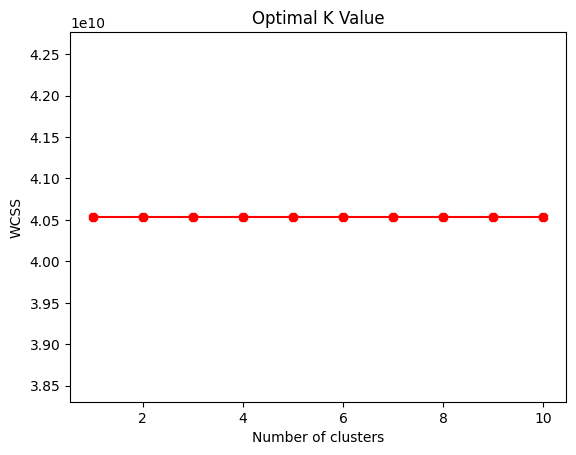

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=1, random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, color='red', marker='8')
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Finding the K-means to the dataset with k=4

In [30]:
model = KMeans(n_clusters=4, random_state=0)
y_means = model.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizig the clusters for K=4

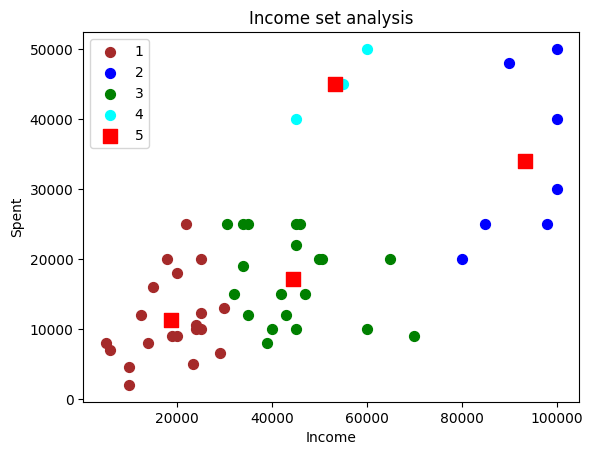

In [31]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='brown', label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue', label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green', label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan', label='4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100, marker='s', c='red', label='5')
plt.title('Income set analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()